In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = './dataset/merged_data_file.csv'
data = pd.read_csv(file_path)
print(data.head())

  assessmentId internalTaxonId            scientificName redlistCategory  \
0     84727794        22715775         Liocichla steerii   Least Concern   
1     85854649        22678664      Tetraogallus caspius   Least Concern   
2     85855433        22678707         Alectoris barbara   Least Concern   
3     85924042        22678652  Ammoperdix griseogularis   Least Concern   
4     85926819        45100023       Phasianus colchicus   Least Concern   

  redlistCriteria yearPublished           assessmentDate criteriaVersion  \
0             NaN          2016  2016-10-01 00:00:00 UTC             3.1   
1             NaN          2016  2016-10-01 00:00:00 UTC             3.1   
2             NaN          2016  2016-10-01 00:00:00 UTC             3.1   
3             NaN          2016  2016-10-01 00:00:00 UTC             3.1   
4             NaN          2016  2016-10-01 00:00:00 UTC             3.1   

  language                                          rationale  ...  \
0  English  Alth

Counts for Family1:
Tyrannidae        448
Thraupidae        401
Psittacidae       379
Columbidae        340
Furnariidae       324
                 ... 
Donacobiidae        1
Peucedramidae       1
Pluvianellidae      1
Zeledoniidae        1
Pluvianidae         1
Name: Family1, Length: 245, dtype: int64

Counts for Order1:
Passeriformes          6402
Caprimulgiformes        536
Piciformes              480
Psittaciformes          402
Charadriiformes         377
Columbiformes           340
Galliformes             293
Accipitriformes         251
Strigiformes            226
Coraciiformes           185
Anseriformes            170
Gruiformes              163
Cuculiformes            150
Procellariiformes       145
Pelecaniformes          110
Bucerotiformes           72
Falconiformes            62
Struthioniformes         59
Suliformes               51
Trogoniformes            43
Otidiformes              26
Musophagiformes          24
Podicipediformes         20
Ciconiiformes            20
Sphen

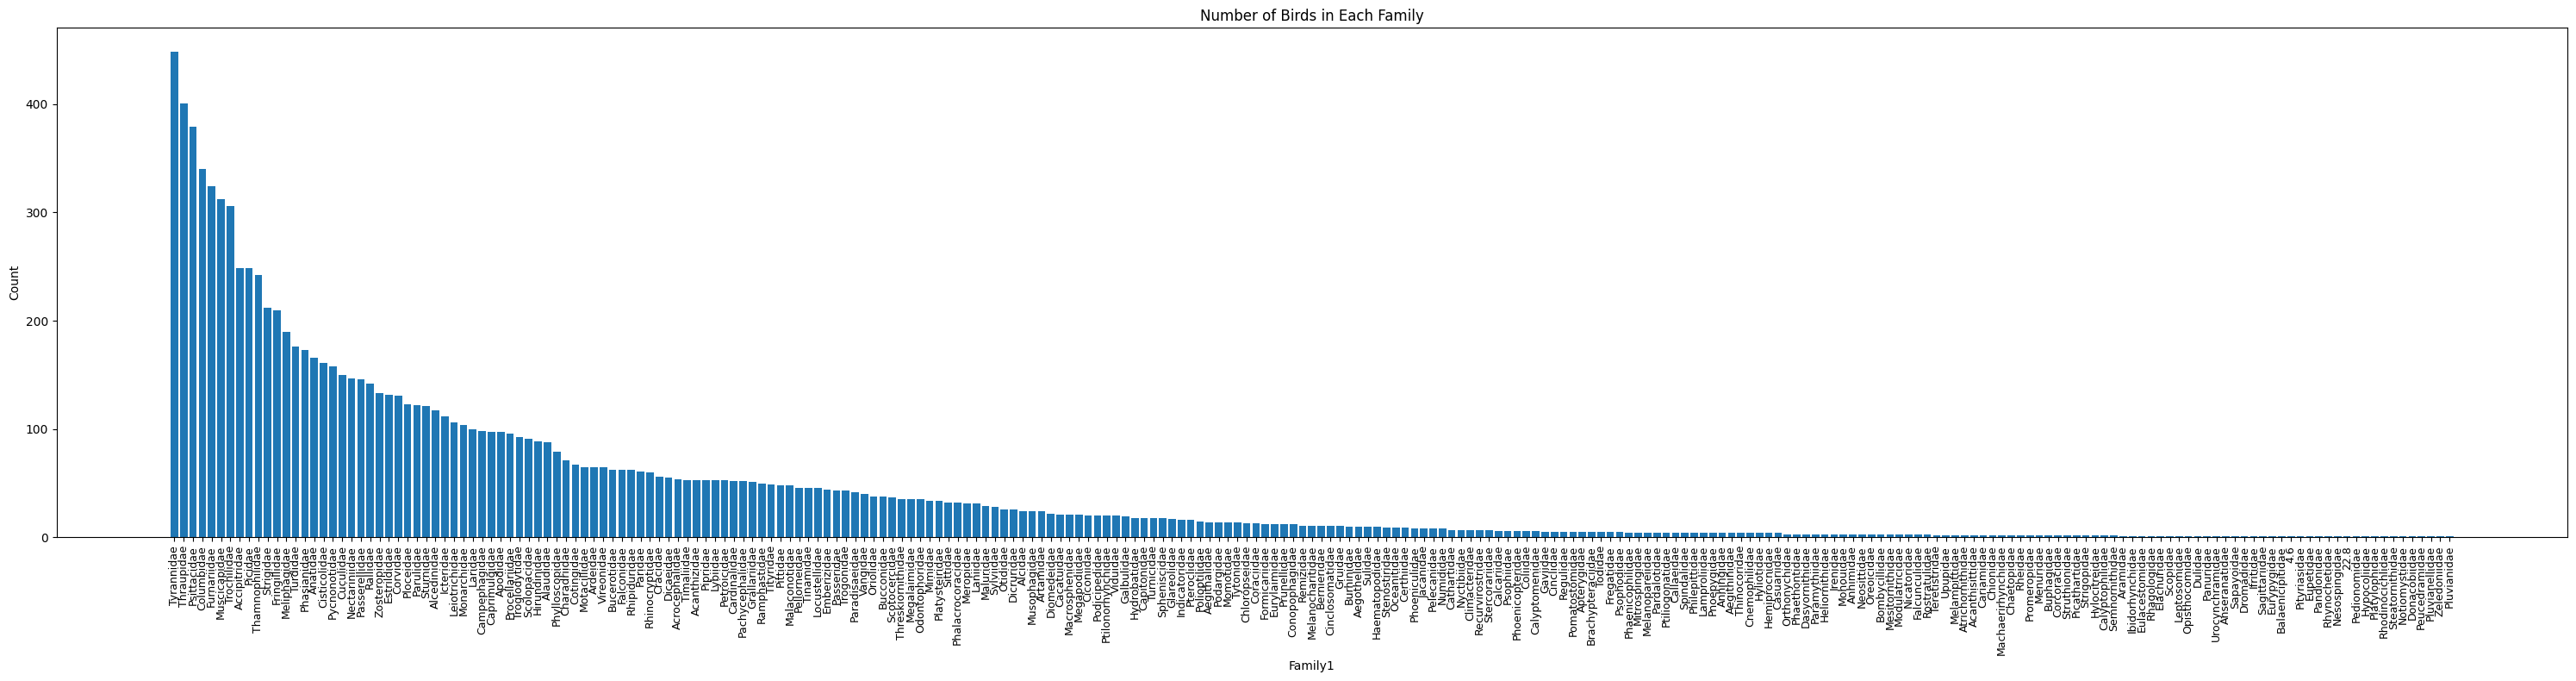

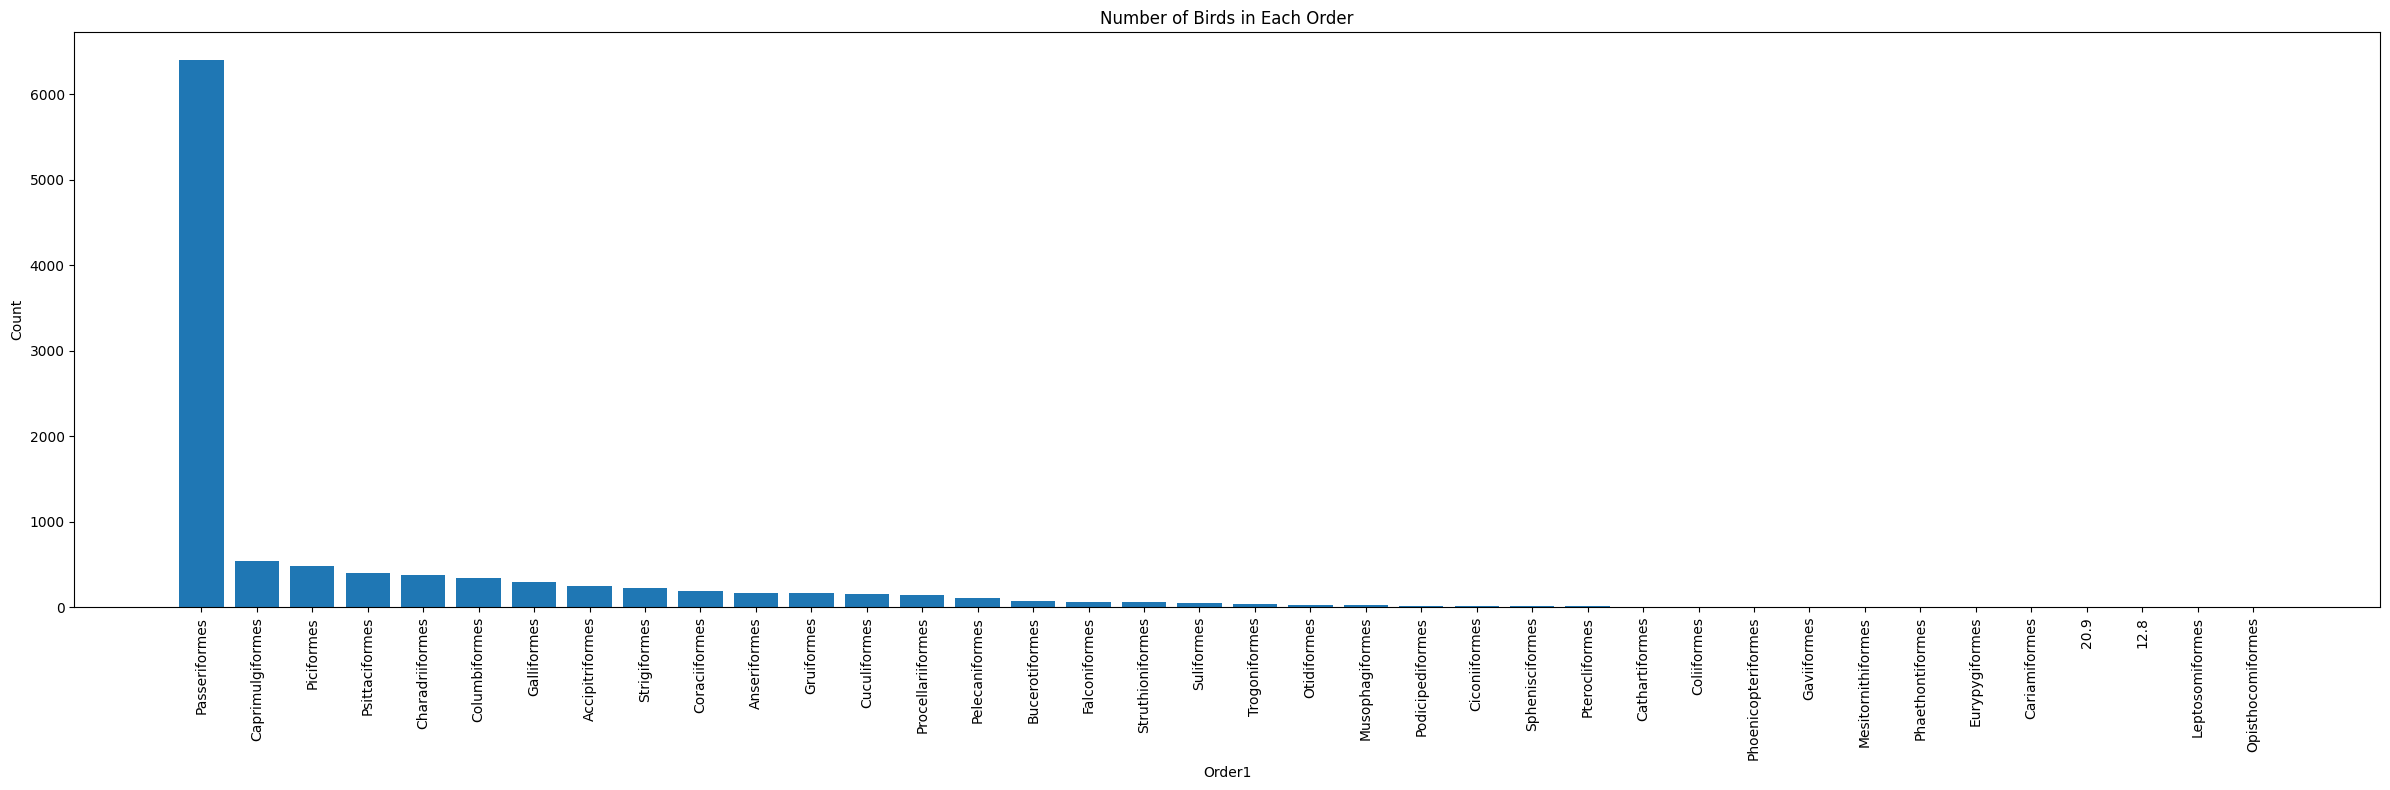

In [2]:

categories = ['Family1', 'Order1']

# Count the number of birds in each category for 'family1' and 'order1'
family_counts = data['Family1'].value_counts()
order_counts = data['Order1'].value_counts()

print("Counts for Family1:")
print(family_counts)

print("\nCounts for Order1:")
print(order_counts)

plt.figure(figsize=(30, 8))
plt.bar(family_counts.index, family_counts.values)
plt.xticks(rotation=90, fontsize=9)
plt.title('Number of Birds in Each Family')
plt.ylabel('Count')
plt.xlabel('Family1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 8))
plt.bar(order_counts.index, order_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Birds in Each Order')
plt.ylabel('Count')
plt.xlabel('Order1')
plt.tight_layout()
plt.show()


In [ ]:
df_filtered = df_filtered[df_filtered['Order1'] == 'Psittaciformes']

Number of nodes: 448
Number of edges: 63536
Top node by degree centrality:
Hemitriccus josephinae 0.7874720357941835


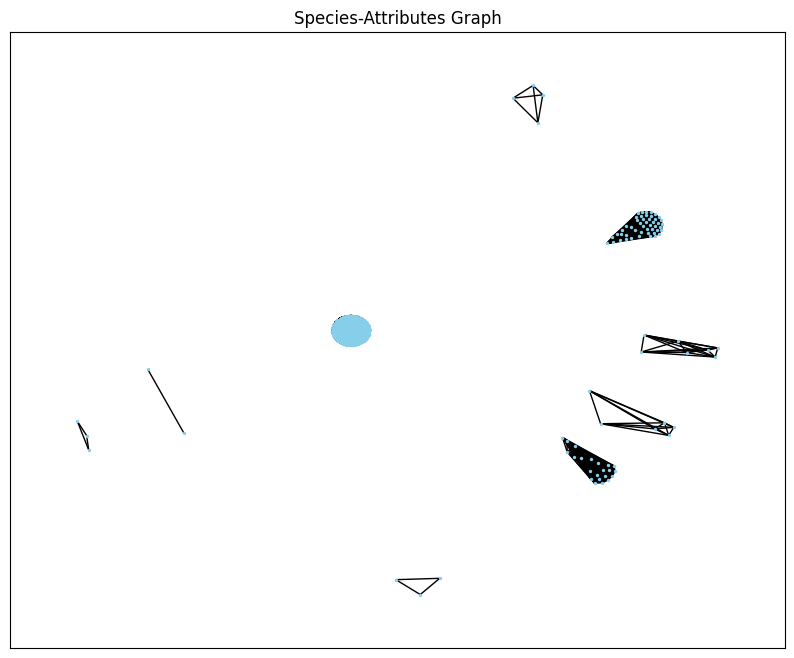

In [64]:
G = nx.Graph()

attributes = ['Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle']
data = data.dropna(subset=attributes, how='any') #
data.to_csv('filtered_species_data.csv', index=False)

# Add nodes for each species
for _, row in data.iterrows():
    species = row['scientificName']
    G.add_node(species)

for _, row in data.iterrows():
    species = row['scientificName']
    
''' # Add edges if one attributes match
for attr in attributes:
    # Group species by attribute
    groups = data.groupby(attr)['scientificName'].apply(list)
    for group in groups:
        # Add edges for all pairs in the group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j]) '''
                
# Add edges only if all attributes match
for i, row1 in data.iterrows():
    for j, row2 in data.iterrows():
        if i >= j:
            continue  # Avoid duplicate and self-comparisons
        species1 = row1['scientificName']
        species2 = row2['scientificName']
        
        # Check if all attributes match
        if all(row1[attr] == row2[attr] for attr in attributes):
            G.add_edge(species1, species2)


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top node by degree centrality:")
for node, centrality in sorted_centrality[:1]:
    print(node, centrality)

#print(data.head())
#print("Is the graph connected?", nx.is_connected(G))

# Step 7: Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1, iterations=300, scale=50)
nx.draw_networkx_nodes(G, pos, node_size=2, node_color="skyblue")
nx.draw_networkx_edges(G, pos)
plt.title("Species-Attributes Graph")
plt.show()

# Step 9: Save the graph
nx.write_gml(G, "species_attributes_graph.gml")
